# Certamen de Simulación Estocástica - Pregunta 3
- Diego Astaburuaga

**III.** En esta pregunta se busca simular funciones de $L^2(\Omega)$. Para esto, recordamos que una función $f(t)\in L^2(\Omega)$ se puede escribir mediante una secuencia de bases ortogonales $\{\phi_i\}_{i=0}^\infty$ y una secuencia de números reales $\{\kappa_i\}_{i=0}^\infty$ como

$$
f(t):=f(t,\{\kappa_i\}_{i=0}^\infty)=\sum_{i=0}^\infty\kappa_i\phi_i(t)
$$

Considernando la secuencia de variables aleatorias independientes $\{S_k\}_{k=0}^\infty$ donde $S_k$ proviene de una distribución $Beta(1-\alpha,\theta +\alpha k)$. Se puede demostrar que el proceso $W_k=S_k\Pi_{i=0}^{k-1}(1-S_i)$ satisface que $W_k>0$ para todo número $k$ y que además $\sum_{k=0}^\infty W_k=1$. Realice las simulaciones:

## a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

Ideas:

- Entender $W_k$ como una serie de tiempo para comparar entre distintos parameters.
    - Trabajar $W_k$ como datos y calcular su varianza y gráficarla versus los parametros.
    - Entender si existe tendencia en $W_k$ para los distintos parametros (considerar log(y)=x+\epsilon).

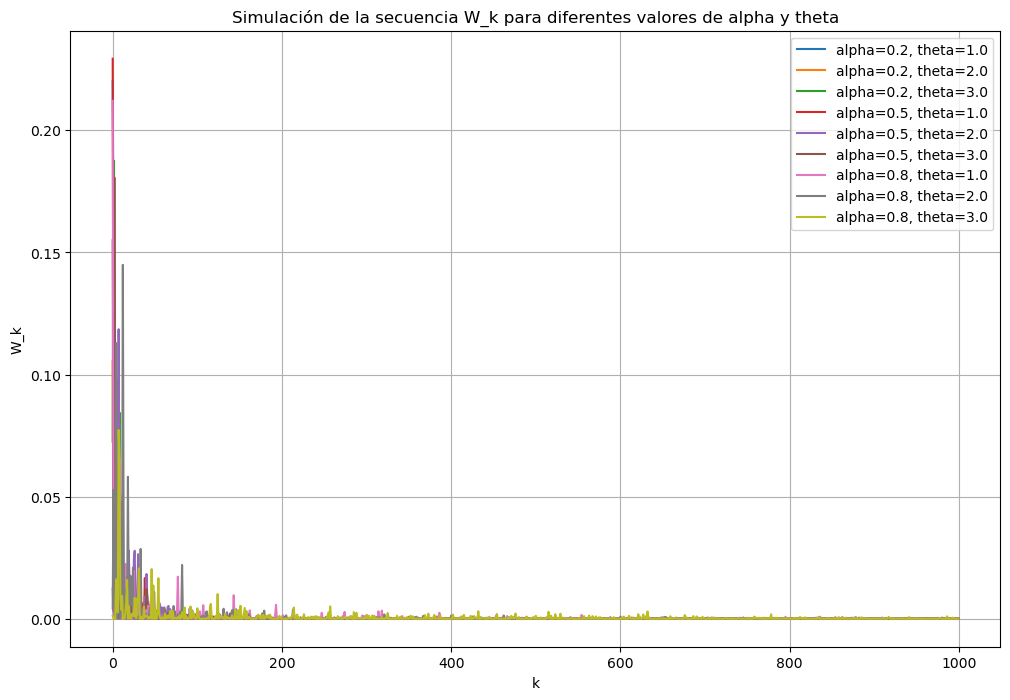

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular la secuencia W_k
def simulate_W_sequence(alpha, theta, num_samples):
    S_values = np.random.beta(1 - alpha, theta + alpha * np.arange(1, num_samples + 1))
    W_values = S_values * np.cumprod(1 - S_values)
    return W_values

# Valores de alpha y theta para la simulación
alpha_values = [0.2, 0.5, 0.8]
theta_values = [1.0, 2.0, 3.0]

# Número de muestras
num_samples = 1000

# Simulación y gráficos para diferentes valores de alpha y theta
plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    for theta in theta_values:
        W_sequence = simulate_W_sequence(alpha, theta, num_samples)
        plt.plot(W_sequence, label=f'alpha={alpha}, theta={theta}')

plt.xlabel('k')
plt.ylabel('W_k')
plt.title('Simulación de la secuencia W_k para diferentes valores de alpha y theta')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# Función para generar funciones basadas en secuencias W_k
def generate_functions(alpha, theta, num_samples):
    W_sequence = simulate_W_sequence(alpha, theta, num_samples)
    
    # Genera una función periódica y par en el intervalo [-1, 1]
    f_periodic = lambda t: np.sum(np.sqrt(W_sequence) * np.sin((2 * np.pi * np.arange(1, num_samples + 1) * t) / 2))

    # Genera una función estrictamente creciente en el intervalo [0, 1]
    f_increasing = lambda t: np.cumsum(np.sqrt(W_sequence)) / np.sum(np.sqrt(W_sequence))

    # Genera una función positiva e integrada a 1 en [0, 1]
    f_positive_integral = lambda t: np.cumsum(W_sequence) / np.sum(W_sequence)
    
    return f_periodic, f_increasing, f_positive_integral

# Ejemplo de uso
alpha = 0.5
theta = 2.0
num_samples = 1000

f_periodic, f_increasing, f_positive_integral = generate_functions(alpha, theta, num_samples)

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

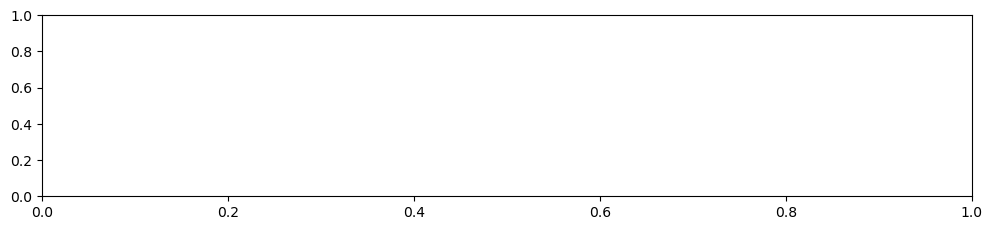

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular la secuencia W_k
def simulate_W_sequence(alpha, theta, num_samples):
    S_values = np.random.beta(1 - alpha, theta + alpha * np.arange(1, num_samples + 1))
    W_values = S_values * np.cumprod(1 - S_values)
    return W_values

# Valores de alpha y theta para la simulación
alpha = 0.5
theta = 2.0

# Número de muestras
num_samples = 1000

# Simulación de la secuencia W_k
W_sequence = simulate_W_sequence(alpha, theta, num_samples)

# Función para generar funciones basadas en secuencias W_k
def generate_functions(alpha, theta, num_samples):
    W_sequence = simulate_W_sequence(alpha, theta, num_samples)
    
    # Genera una función periódica y par en el intervalo [-1, 1]
    f_periodic = lambda t: np.sum(np.sqrt(W_sequence) * np.sin((2 * np.pi * np.arange(1, num_samples + 1) * t) / 2), axis=0)

    # Genera una función estrictamente creciente en el intervalo [0, 1]
    f_increasing = lambda t: np.cumsum(np.sqrt(W_sequence), axis=0) / np.sum(np.sqrt(W_sequence))

    # Genera una función positiva e integrada a 1 en [0, 1]
    f_positive_integral = lambda t: np.cumsum(W_sequence, axis=0) / np.sum(W_sequence)
    
    return f_periodic, f_increasing, f_positive_integral

# Genera las funciones
f_periodic, f_increasing, f_positive_integral = generate_functions(alpha, theta, num_samples)

# Puntos de evaluación
t = np.linspace(-1, 1, num_samples)  # Para la función periódica y par
t_increasing = np.linspace(0, 1, num_samples)  # Para la función estrictamente creciente y positiva

# Evalúa las funciones en los puntos de evaluación
y_periodic = f_periodic(t)  
y_increasing = f_increasing(t_increasing)
y_positive_integral = f_positive_integral(t_increasing)

# Graficar las funciones generadas
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, y_periodic)
plt.title('Función Periódica y Par en [-1, 1]')

plt.subplot(3, 1, 2)
plt.plot(t_increasing, y_increasing)
plt.title('Función Estrictamente Creciente en [0, 1]')

plt.subplot(3, 1, 3)
plt.plot(t_increasing, y_positive_integral)
plt.title('Función Positiva e Integrada a 1 en [0, 1]')

plt.tight_layout()
plt.show()
